## 1 ベイズ推論の考え方


### 頻度主義とベイズ主義
---

#### 頻度主義
確率を、「長期間における事象（イベント）の頻度」とみなす。
* 飛行機事故の確率　→　「長期間における飛行機事故の頻度」
* 大統領選挙の当選確率　→　長期間の頻度？一回しか行われない！

#### ベイズ主義
確率を、ある事象が発生する信念または確信の度合いとみなす。
* 飛行機事故の確率　→　他に情報がなければ、頻度主義の確率と一致
* 大統領選挙の当選確率　→　ある候補者Aが当選することをどれくらい確信しているか。

確率を信念とみなすことは、人間にとっても自然な考え方。<br>
証拠が得られたら信念を更新するということを普通にやっている。<br>

* $P(A)$: コインの表が出る確率は50%。
* $P(A|X)$: コインの結果を見て表だったら($X$)、表の事後確率に1.0、裏の事後確率に0.0を割り当てる。
* $P(A)$: ある患者が何らかの病気。
* $P(A|X)$: 血液検査の結果、$X$という証拠が得られたので、いくつかの病気の可能性は排除できる。

#### 関数に例えると

「全てのテストにパスした（$X$）けど、バグはあるかな？」
* 頻度主義:「ありません。」or「あります。」
* ベイズ主義:「ない確率が0.8、ある確率が0.2です。」

証拠の数$N$が非常に大きければ、頻度主義とベイズ主義の推論結果は似てくる。<br>
確率を返すことによって、$N$の大きさによる信念の不確実さの情報を保つ。

### ベイズ推論の枠組み
---

#### ベイズの定理
ベイズ推論は、ベイズの定理によって事前確率と事後確率を結びつける。
\begin{equation}
P(A|X) = \frac{P(A|X)P(A)}{P(X)}
\end{equation}

#### 例題：コイン投げ
コインの表が出る確率$p$はわからないとする。（ほんとは50%）<br>
コイン投げの結果を観測するにつれて、$p$の推論結果がどのように変わるか？




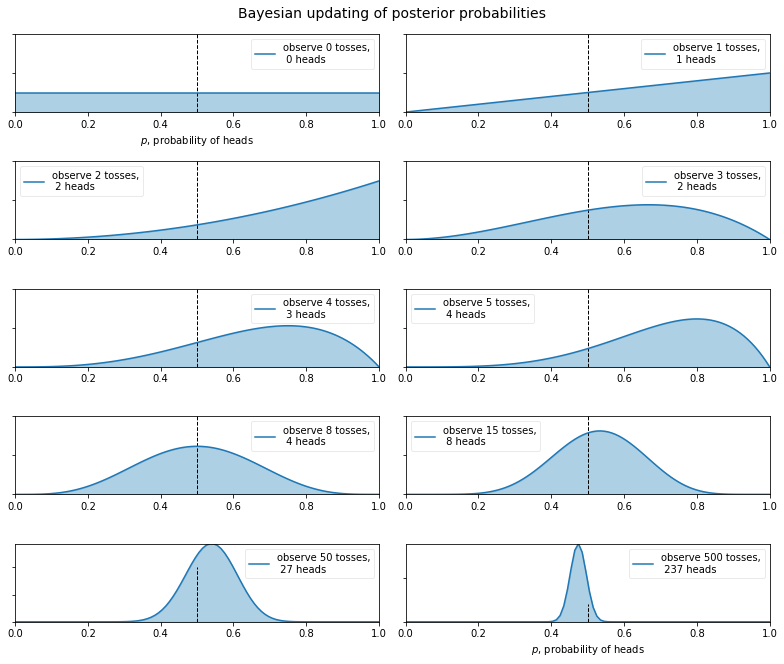

In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

### 確率分布
---

#### ポアソン分布（確率変数が離散）
確率変数$Z$が離散の場合、確率分布は確率質量関数（PMF）と呼び、$Z$が$k$を取る確率を$P(Z=k)$で表す。<br>
$Z$が以下のPMFに従うとき、$Z$はポアソン分布に従う。

$$Z \sim \text{Poi}(\lambda) $$
$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots, \; \; \lambda \in \mathbb{R}_{>0} $$

ポアソン分布の期待値は、$\lambda$に等しい。
$$E[ \;Z\; | \; \lambda \;] = \lambda $$



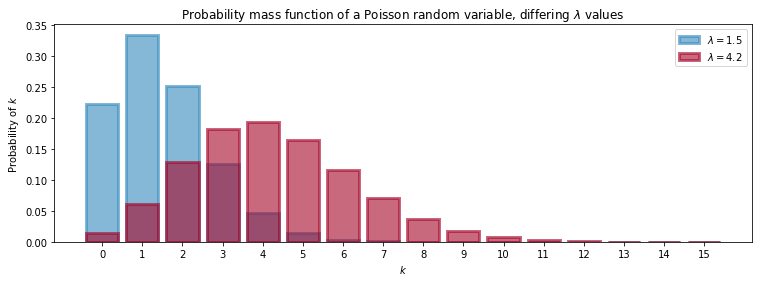

In [2]:
import scipy.stats as stat
figsize(12.5, 4)

poi = stats.poisson
lambda_ = [1.5, 4.25]
colors = ['#348ABD', '#A60628']

a = np.arange(16)
plt.bar(a, poi.pmf(a, lambda_[0]), color=colors[0],
        label='$\lambda = %.1f$' % lambda_[0],
        alpha=0.6, edgecolor=colors[0], lw='3')

plt.bar(a, poi.pmf(a, lambda_[1]), color=colors[1],
        label='$\lambda = %.1f$' % lambda_[1],
        alpha=0.6, edgecolor=colors[1], lw='3')

plt.xticks(a, a)
plt.legend()
plt.ylabel('Probability of $k$')
plt.xlabel('$k$')
plt.title('Probability mass function of a Poisson random variable, differing $\lambda$ values')

#### 指数分布（確率変数が連続）
確率変数$Z$が連続の場合は、確率質量関数でなく確率密度関数（PDF）で表される。<br>
$Z$が以下のPDFに従うとき、$Z$は指数分布に従う。

$$Z \sim \text{Exp}(\lambda)$$
$$f_Z(z | \lambda) = \lambda e^{-\lambda z }, \;\; z\ge 0$$

指数分布の期待値は、$\lambda$の逆数に等しい。

$$E[\; Z \;|\; \lambda \;] = \frac{1}{\lambda}$$

確率密度関数の値は確率ではない！

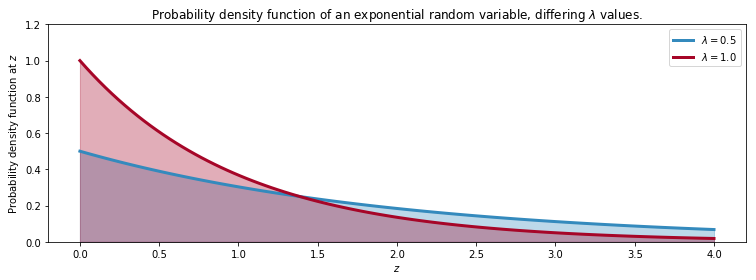

In [3]:
a = np.linspace(0, 4, 100)
expon = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colors):
    plt.plot(a, expon.pdf(a, scale=1.0 / l),
             lw=3, color=c, label='$\lambda = %.1f$' % l)
    plt.fill_between(a, expon.pdf(a, scale=1.0 / l),
                     color=c, alpha=0.33)

plt.legend()
plt.ylabel('Probability density function at $z$')
plt.xlabel('$z$')
plt.ylim(0, 1.2)
plt.title('Probability density function of an exponential random variable, differing $\lambda$ values.')

### ベイズ推論やってみる
---

#### 受信メッセージ数の変化点検出
日時のメッセージ受信数が与えられたとする。メッセージ受信数が時間が経つにつれて変化しているかどうかを知りたい。

(0, 74)

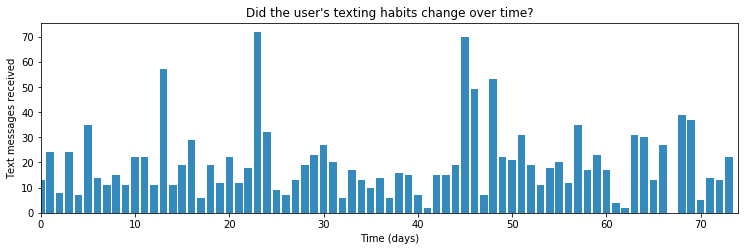

In [4]:
figsize(12.5, 3.5)

count_data = np.loadtxt('data/txtdata.csv')
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color='#348ABD')

plt.xlabel('Time (days)')
plt.ylabel('Text messages received')
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data)

*どうモデリングすれば良いの？*

この計数データ（離散）をポアソン分布でモデリングする。<br>
$i$日目のメッセージ数を$C_i$とすると、

$$ C_i \sim \text{Poisson}(\lambda)  $$

$\tau$日目でメッセージ数が変化する（分布のパラメータ$\lambda$が変化する）と仮定する。

$$
\lambda = 
\begin{cases}
\lambda_1  & \text{if } t \lt \tau \cr
\lambda_2 & \text{if } t \ge \tau
\end{cases}
$$

この$\lambda_1$, $\lambda_2$を推定する！


まず$\lambda_1$, $\lambda_2$の事前分布を決める。<br>
これらは正の実数なので、さっき出てきた指数分布を使ってモデル化してみる。

\begin{align}
&\lambda_1 \sim \text{Exp}( \alpha ) \\\
&\lambda_2 \sim \text{Exp}( \alpha )
\end{align}

$\alpha$はハイパーパラメータ。<br>
指数分布では期待値が$\alpha$の逆数に等しいので、計数データの平均値の逆数に設定する。（必ずしもこうする必要はない）

$$\frac{1}{N}\sum_{i=0}^N \;C_i \approx E[\; \lambda \; |\; \alpha ] = \frac{1}{\alpha}$$ 

次に、$\tau$の事前分布を決める。<br>
結構バラついてるのでこの辺かな？というのが難しい。一様分布を使う。→どの日も同等であるという信念をもっている。

\begin{align}
& \tau \sim \text{DiscreteUniform(1,70) }\\\\
& \Rightarrow P( \tau = k ) = \frac{1}{70}
\end{align}


*で、どうやって推定するの？*

ベイズ推定ライブラリ、PyMCを使おう！<br>
Markov Chain Monte Carlo (MCMC)で事後分布を求める。<br>
実際に値をサンプルしまくって求める手法。詳しくは3章で。

In [5]:
import pymc as pm

alpha = 1.0 / count_data.mean()

# lambda：指数分布
lambda_1 = pm.Exponential('lambda_1', alpha)
lambda_2 = pm.Exponential('lambda_2', alpha)

# tau：離散一様分布
tau = pm.DiscreteUniform('tau', lower=0, upper=n_count_data)
print('Random output: ', tau.random(), tau.random(), tau.random())

# このデコレーターの意味は2章で
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1    # tauより前のlambda
    out[tau:] = lambda_2    # tauから後のlambda
    return out

# 観測したメッセージ計数データ：ポアソン分布
observation = pm.Poisson('obs', lambda_, value=count_data, observed=True)

# 確率モデルのインスタンス
model = pm.Model([observation, lambda_1, lambda_2, tau])

# MCMC（3章）
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)

Random output:  31 6 4
 [-----------------100%-----------------] 40000 of 40000 complete in 10.5 sec

ベイズ推論では、結果が確率分布として得られる。<br>
推定値の分布の幅が広いと不確実さが高い。

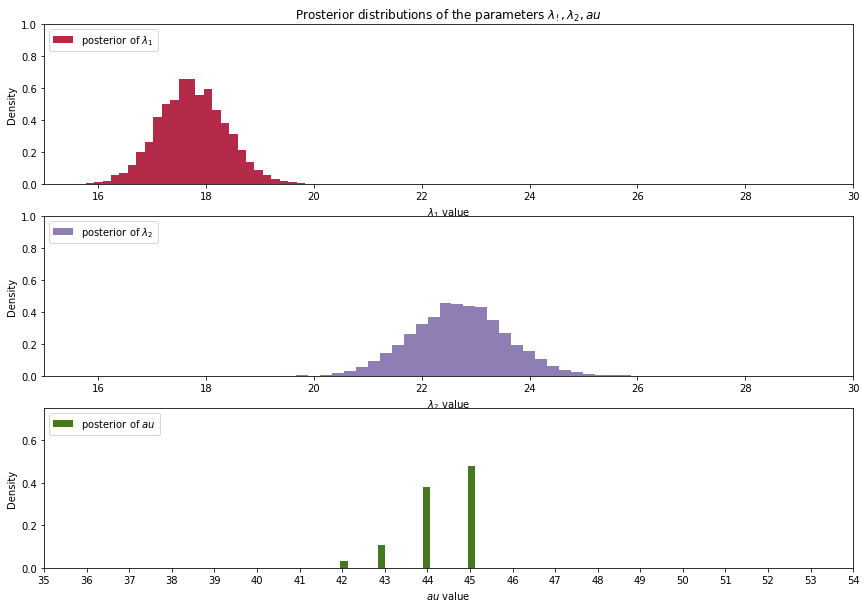

In [6]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

figsize(14.5, 10)

ax = plt.subplot(311)
ax.set_autoscaley_on(False)
plt.hist(lambda_1_samples, histtype='stepfilled',
         bins=30, alpha=0.85, color='#A60628', normed=True,
         label='posterior of $\lambda_1$')
plt.legend(loc='upper left')
plt.title('Prosterior distributions of the parameters $\lambda_!, \lambda_2, \tau$')
plt.xlim([15, 30])
plt.xlabel('$\lambda_1$ value')
plt.ylabel('Density')

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled',
         bins=30, alpha=0.85, color='#7A68A6', normed=True,
         label='posterior of $\lambda_2$')
plt.legend(loc='upper left')
plt.xlim([15, 30])
plt.xlabel('$\lambda_2$ value')
plt.ylabel('Density')

ax = plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
ax.set_autoscaley_on(False)
plt.hist(tau_samples, histtype='stepfilled',
         bins=n_count_data, alpha=1, color='#467821', normed=False,
         weights=w, rwidth=2.0,
         label='posterior of $\tau$')
plt.legend(loc='upper left')
plt.xticks(np.arange(n_count_data))
plt.xlim([35, len(count_data) - 20])
plt.ylim([0, 0.75])
plt.xlabel('$\tau$ value')
plt.ylabel('Density')

*なにがわかったの？*

* $\lambda_1$ はだいたい18、$\lambda_2$はだいたい23くらい。→メッセージ受信数の振る舞いに変化があった。
* $\tau = 45$日目に振る舞いが変わった確率が50%くらい。→この辺の数日中に変化があった。（変化が緩やかなら分布の幅はもっと広いはず）


$t$日目のメッセージ数の期待値を求めてみる。<br>
$t$日目のメッセージ数の期待値 = $t$日目の$\lambda$の期待値
（ポアソン分布の期待値は$\lambda$なので）

[ 17.7434782   17.7434782   17.7434782   17.7434782   17.7434782
  17.7434782   17.7434782   17.7434782   17.7434782   17.7434782
  17.7434782   17.7434782   17.7434782   17.7434782   17.7434782
  17.7434782   17.7434782   17.7434782   17.7434782   17.7434782
  17.7434782   17.7434782   17.7434782   17.7434782   17.7434782
  17.7434782   17.7434782   17.7434782   17.7434782   17.7434782
  17.7434782   17.7434782   17.7434782   17.74349222  17.74349222
  17.74350624  17.74350624  17.74355105  17.74362831  17.74456083
  17.74507359  17.74952899  17.89518856  18.38699604  20.27292562
  22.70261255  22.70300427  22.70300427  22.70300427  22.70300427
  22.70300427  22.70300427  22.70300427  22.70300427  22.70300427
  22.70300427  22.70300427  22.70300427  22.70300427  22.70300427
  22.70300427  22.70300427  22.70300427  22.70300427  22.70300427
  22.70300427  22.70300427  22.70300427  22.70300427  22.70300427
  22.70300427  22.70300427  22.70300427  22.70300427]


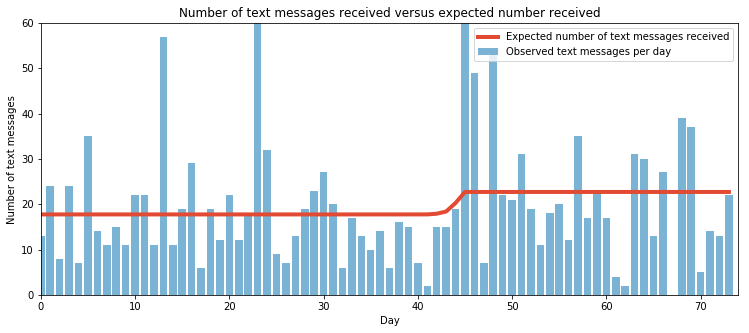

In [7]:
figsize(12.5, 5)

N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)

for day in range(0, n_count_data):
    ix = day < tau_samples
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum() + lambda_2_samples[~ix].sum()) / N

plt.plot(range(n_count_data), expected_texts_per_day,
        lw=4, color='#E24A33',
        label='Expected number of text messages received')
plt.xlim(0, n_count_data)
plt.ylim(0, 60)
plt.xlabel('Day')
plt.ylabel('Number of text messages')
plt.title('Number of text messages received versus expected number received')

plt.bar(np.arange(len(count_data)), count_data,
        color='#348ABD', alpha=0.65,
        label='Observed text messages per day')
plt.legend()

print(expected_texts_per_day)

* $\lambda_1, \lambda_2$の分布が異なっていた。
* $\tau$分布の幅が狭かった。

ので、
* 受信数の振る舞いが変化した。
* その変化は急激だった。

という信念を支持した結果になる。

#### まとめ

* 頻度主義とベイズ主義の違いを紹介した。
* ポアソン分布と指数分布を紹介した。
* 受信メッセージ数の変化点検出をベイズ推定でやってみた。